In [2]:
# importing libraries    
import numpy as np    
import matplotlib.pyplot as plt    
import pandas as pd    
import seaborn as sns

In [29]:
# Importing the dataset  
df= pd.read_csv('Mall_Customers.csv',index_col='CustomerID')
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
246,Male,30,297,69
247,Female,56,311,14
248,Male,29,313,90


In [7]:
df.columns
df.columns = ['Gender', 'Age', 'AnnIncome','SpendScore']

In [8]:
df

,Gender,Age,AnnIncome,SpendScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
246,Male,30,297,69
247,Female,56,311,14
248,Male,29,313,90


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 1 to 250
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      250 non-null    object
 1   Age         250 non-null    int64 
 2   AnnIncome   250 non-null    int64 
 3   SpendScore  250 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.8+ KB


In [12]:
# Handling object type data
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Gender']

CustomerID
1      1
2      1
3      0
4      0
5      0
      ..
246    1
247    0
248    1
249    0
250    0
Name: Gender, Length: 250, dtype: int32

In [14]:
df.isna().sum()

Gender        0
Age           0
AnnIncome     0
SpendScore    0
dtype: int64

### Exploratory Data Analysis (EDA)

In [15]:
 df.describe()

,Gender,Age,AnnIncome,SpendScore
count,250.000000,250.00000,250.000000,250.000000
mean,0.452000,38.49200,95.592000,50.244000
std,0.498689,13.17026,77.308758,27.289914
min,0.000000,18.00000,15.000000,1.000000
25%,0.000000,29.00000,47.000000,27.000000
50%,0.000000,36.00000,70.000000,50.000000
75%,1.000000,47.75000,101.000000,74.000000
max,1.000000,70.00000,325.000000,99.000000


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,250.0,0.452,0.498689,0.0,0.0,0.0,1.00,1.0
Age,250.0,38.492,13.170260,18.0,29.0,36.0,47.75,70.0
AnnIncome,250.0,95.592,77.308758,15.0,47.0,70.0,101.00,325.0
SpendScore,250.0,50.244,27.289914,1.0,27.0,50.0,74.00,99.0


In [17]:
dist = df.Gender.value_counts()
dist

0    137
1    113
Name: Gender, dtype: int64

<Axes: >

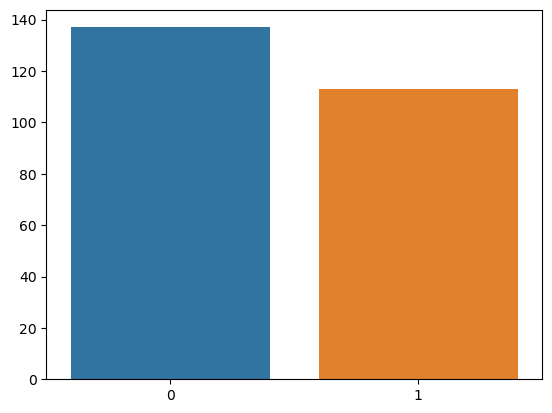

In [18]:
sns.barplot(x=dist.index, y=dist.values)

<Axes: xlabel='Age', ylabel='Count'>

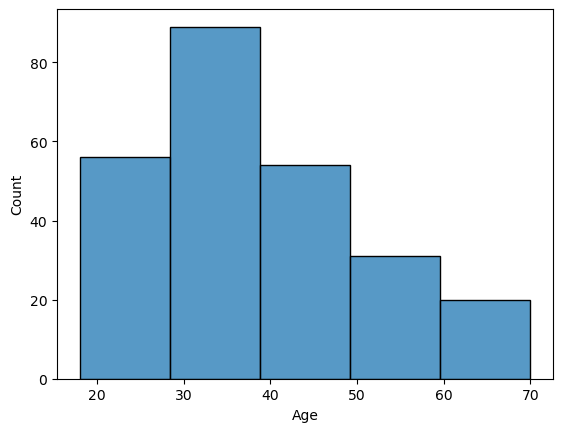

In [19]:
sns.histplot(x=df.Age, bins=5,binrange=[18,70])

<Axes: xlabel='AnnIncome', ylabel='Count'>

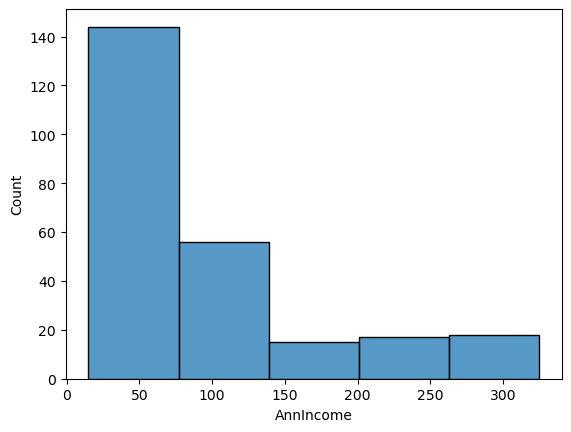

In [20]:
sns.histplot(x=df.AnnIncome,bins=5)

<Axes: xlabel='SpendScore', ylabel='Count'>

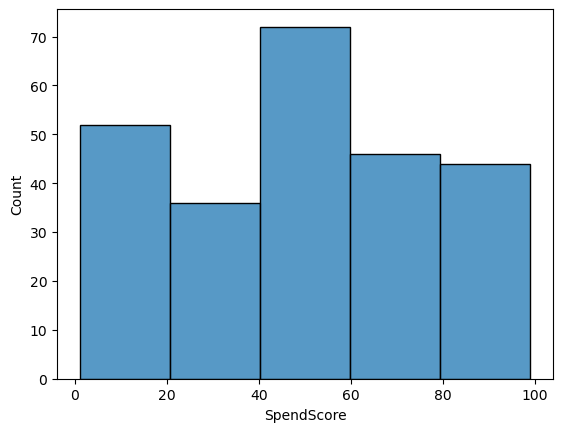

In [21]:
sns.histplot(x=df.SpendScore, bins=5)

In [41]:
# # using this we will get an idea about which pairs of column is most suitably clustered
sns.pairplot(df)

In [22]:
x = df.iloc[:, [2,3]].values  #feature
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [23]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  #.inertia_ is attribute of sklearn-kmeans algo,which provides sum of squared distance
 

C:\Users\pravi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pravi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pravi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pravi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarnin

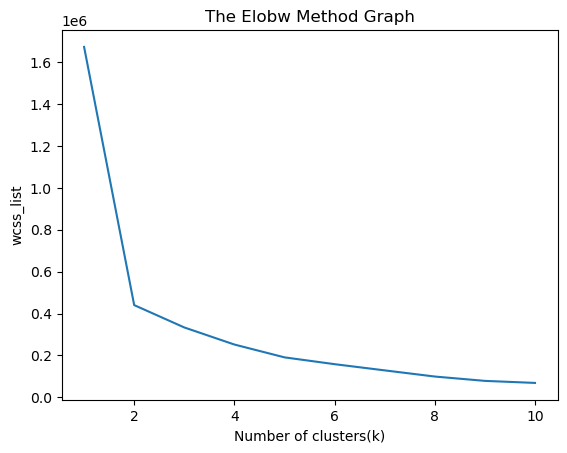

In [24]:
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show() 

In [25]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 

C:\Users\pravi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pravi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

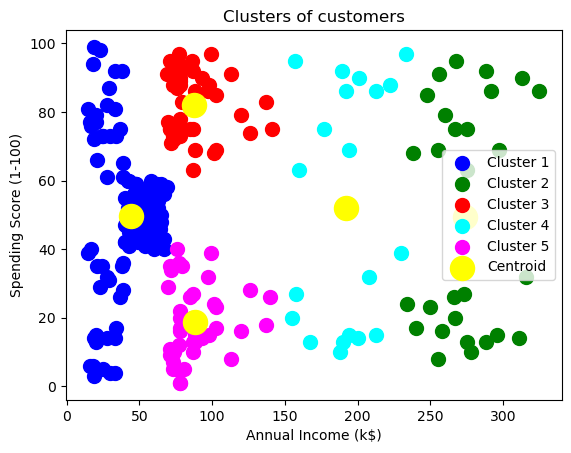

In [27]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')  
#centroid is the mean(average) of all the datapoints in a cluster
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  


### OR

In [23]:
# for Kmeans clustering we will need perfect value of 'n_cluster'
# to find this value we will need ELBOW method testing
inertiaz = []
ks= np.arange(1,10)
for k in ks:
    kmean = KMeans(n_clusters=k)
    kmean.fit(x)
    inertiaz.append(kmean.inertia_) 


C:\Users\pravi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pravi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pravi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pravi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarnin

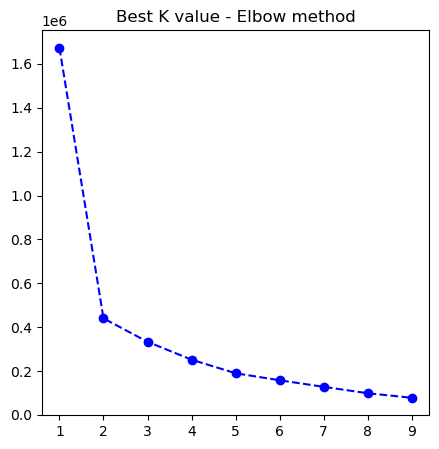

In [24]:
plt.figure(1,figsize=(5,5))
plt.plot(ks, inertiaz,'bo--')
plt.title('Best K value - Elbow method')
plt.show()

In [25]:
obj = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = obj.fit_predict(x)


C:\Users\pravi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pravi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='AnnIncome', ylabel='SpendScore'>

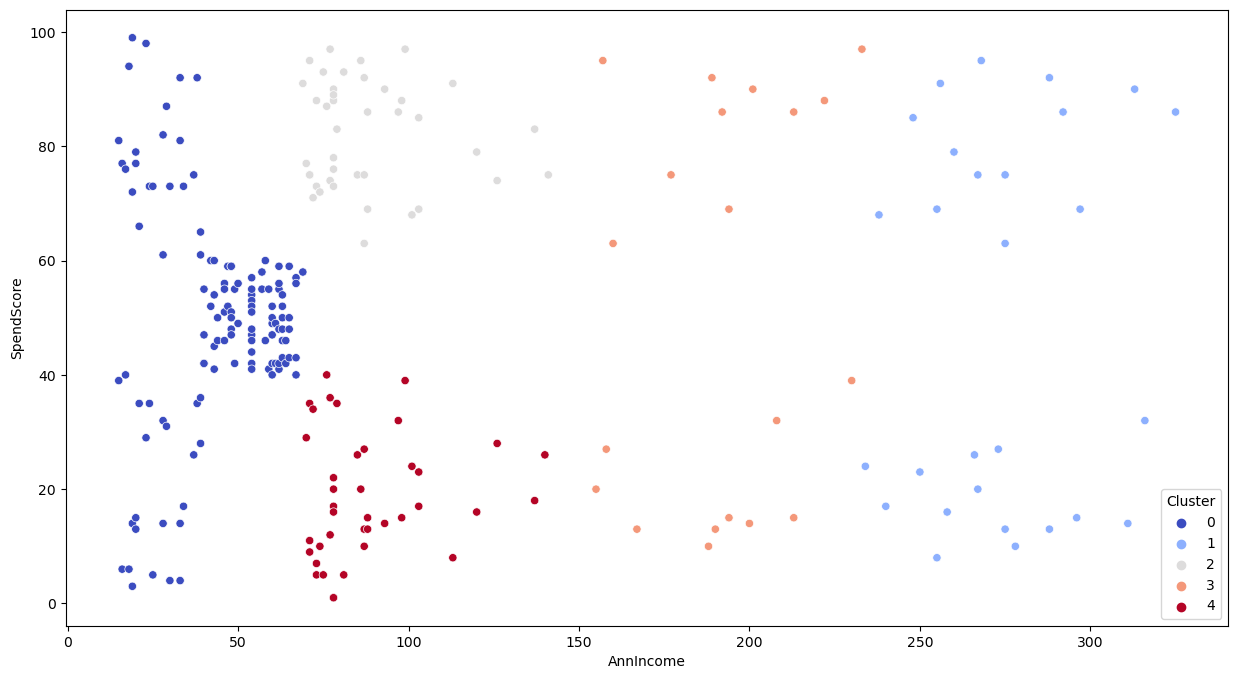

In [26]:
plt.figure(1, figsize=(15,8))
sns.scatterplot(x= df.AnnIncome, y=df.SpendScore, hue = df.Cluster, palette='coolwarm')